In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jihoonkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jihoonkim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
filename = 'car_reviews.csv'
df = pd.read_csv(filename)

In [3]:
df_old = df.copy()

# Task 1

In [4]:
# pre-processing data...

# converting 'Pos' and 'Neg' labels to 1 and 0
label_dic = {'Neg': 0, 'Pos': 1}
df['Sentiment'] = df['Sentiment'].map(label_dic)

# print('shape of the dataframe: {}'.format(df.shape))
# print('Data types:\n{}'.format(df.dtypes))


# change all the sentences to lower-case (case-insensitive)
df['Review'] = df['Review'].str.lower()

# tokenise the sentence - sentence to list of words
# Identifying and excluding all punctuation and words that are not likely to affect sentiment - NLTK stopwords.
# word stemming using NLTK.stem.PorterStemmer() - convert the words to root words

# tokenize the reviews
df['Review'] = df['Review'].map(lambda x: word_tokenize(x))

# sentence = [ps.stem(w) for w in words if not w in stopwords]




In [5]:
# func for removing stopwords
def remove_stopwords(lst):
    stop_words = set(stopwords.words('english'))
    return [i for i in lst if i not in stop_words]

In [6]:
# removing stopwords
df['Review'] = df['Review'].map(lambda x: remove_stopwords(x))

In [7]:
df

,Sentiment,Review
0,0,"[1992, bought, new, taurus, really, loved, 199..."
1,0,"[last, business, trip, drove, san, francisco, ..."
2,0,"[husband, purchased, 1990, ford, f250, nothing..."
3,0,"[feel, thorough, opinion, truck, compared, pos..."
4,0,"[mother, 3, still, carseats, logical, thing, t..."
...,...,...
1377,1,"[june, bought, sony, limited, edition, focus, ..."
1378,1,"[140, 000, miles, decided, replace, wifes, 199..."
1379,1,"[ford, focus, great, little, record, setting, ..."
1380,1,"[needed, new, car, hyundai, excel, 91, decided..."


In [8]:
# Task 1A
# demonstrate that words and punctuation, which are unlikely to affect sentiment
# have been excluded from the sentiment classifier AND that the remaining words 
# are not being handled in a case sensitive way

print('The first line of review before excluding words and punctuation:')
print(df_old['Review'][0])
print('\nThe first line of review after excluding words and punctuation:')
print(df['Review'][0])

The first line of review before excluding words and punctuation:
 In 1992 we bought a new Taurus and we really loved it  So in 1999 we decided to try a new Taurus  I did not care for the style of the newer version  but bought it anyway I do not like the new car half as much as i liked our other one  Thee dash is much to deep and takes up a lot of room  I do not find the seats as comfortable and the way the sides stick out further than the strip that should protect your card from denting It drives nice and has good pick up  But you can not see the hood at all from the driver seat and judging and parking is difficult  It has a very small gas tank I would not buy a Taurus if I had it to do over  I would rather have my 1992 back  I dont think the style is as nice as the the 1992  and it was a mistake to change the style  In less than a month we had a dead battery and a flat tire 

The first line of review after excluding words and punctuation:
['1992', 'bought', 'new', 'taurus', 'really', 

In [9]:
df_old = df.copy()

In [10]:
# func for stemming
def stemming(lst):
    ps = PorterStemmer()
    return [ps.stem(word) for word in lst]

In [11]:
# stemming words
df['Review'] = df['Review'].map(lambda x: stemming(x))

In [12]:
df

,Sentiment,Review
0,0,"[1992, bought, new, tauru, realli, love, 1999,..."
1,0,"[last, busi, trip, drove, san, francisco, went..."
2,0,"[husband, purchas, 1990, ford, f250, noth, pro..."
3,0,"[feel, thorough, opinion, truck, compar, post,..."
4,0,"[mother, 3, still, carseat, logic, thing, trad..."
...,...,...
1377,1,"[june, bought, soni, limit, edit, focu, se, 4,..."
1378,1,"[140, 000, mile, decid, replac, wife, 1990, to..."
1379,1,"[ford, focu, great, littl, record, set, car, f..."
1380,1,"[need, new, car, hyundai, excel, 91, decid, sh..."


In [13]:
df_old

,Sentiment,Review
0,0,"[1992, bought, new, taurus, really, loved, 199..."
1,0,"[last, business, trip, drove, san, francisco, ..."
2,0,"[husband, purchased, 1990, ford, f250, nothing..."
3,0,"[feel, thorough, opinion, truck, compared, pos..."
4,0,"[mother, 3, still, carseats, logical, thing, t..."
...,...,...
1377,1,"[june, bought, sony, limited, edition, focus, ..."
1378,1,"[140, 000, miles, decided, replace, wifes, 199..."
1379,1,"[ford, focus, great, little, record, setting, ..."
1380,1,"[needed, new, car, hyundai, excel, 91, decided..."


In [14]:
# Task 1B
# demonstrate that words with the same stem have been appropriately recognised and treated as variations of the stem
# should be demonstrated for at least 3 different stems...

stem_words = ['decid', 'love', 'feel']

# find these stem words in the converted dataframe...
for word in stem_words:
    leaves = []
    for i, item in enumerate(df['Review']):
        if word in item:
            # get the indices of stem word
            indices = item.index(word)
            # collect the leaf words in a list
            leaves.append(df_old['Review'][i][indices])
    
    unique = np.unique(leaves)
    print('Stem word: {}, leaf words: {}'.format(word, unique))


Stem word: decid, leaf words: ['decide' 'decided' 'decides' 'deciding']
Stem word: love, leaf words: ['love' 'loved' 'lovely' 'loves' 'loving']
Stem word: feel, leaf words: ['feel' 'feeling' 'feelings' 'feels']


In [15]:
# Task 1C
# create a bag of words model (vector)
# using CountVectorizer, create document-term matrix (DTM)
# vocabulary of all words in columns, reviews in rows
# 0 if word does not exist, 1 if does
vector = CountVectorizer()

df['Review'] = df['Review'].map(lambda x: ' '.join(x))

In [16]:
reviews_in_list = [i for i in df['Review']]
dtm = vector.fit_transform(reviews_in_list).toarray()
print(dtm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
# split data into train and test set
y_data = df['Sentiment']
x_data = dtm

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, shuffle=True)


train_shape = len(x_train)
test_shape = len(x_test)
train_percentage = train_shape/(train_shape+test_shape)*100

print('train size: {}, test size: {}, train %: {}%'.format(train_shape, test_shape, round(train_percentage, 2)))

train size: 1105, test size: 277, train %: 79.96%


In [53]:
print('Number of negative reviews in y_test:', len(y_test[y_test==0]))
print('Number of positive reviews in y_test:', len(y_test[y_test==1]))

Number of negative reviews in y_test: 150
Number of positive reviews in y_test: 127


In [50]:
# implement a Naïve Bayes classifier
clf = MultinomialNB()

# train the model
clf.fit(x_train, y_train)

MultinomialNB()

In [51]:
# score with train set...
train_acc = clf.score(x_train, y_train)
print('Classifier accuracy for train set: {}%'.format(round(train_acc*100), 2))

Classifier accuracy for train set: 93.0%


In [52]:
# score with test set...
test_acc = clf.score(x_test, y_test)
print('Classifier accuracy for test set: {}%'.format(round(test_acc*100), 2))

Classifier accuracy for test set: 74.0%


In [22]:
# report the classifier’s performance using a confusion matrix
from sklearn.metrics import confusion_matrix
y_test_pred = clf.predict(x_test)
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[104  46]
 [ 26 101]]


Confusion matrix
[[104  46]
 [ 26 101]]
Normalised confusion matrix
[[0.69333333 0.30666667]
 [0.20472441 0.79527559]]


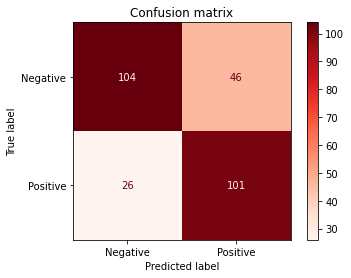

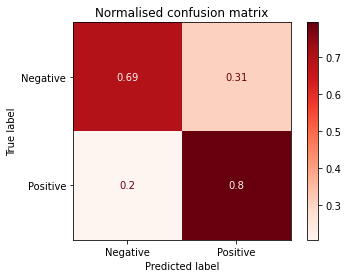

In [23]:
# Plot non-normalized confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


matrix_visualisation = [("Confusion matrix", None),
                  ("Normalised confusion matrix", 'true')]
for title, normalize in matrix_visualisation:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Task 2

## How to improve:
Apply modifications to the Naïve Bayes implementation: 
1. Use Term Frequency-Inverse Document Frequency (TF-IDF) instead of document-term matrix (DTM). TF-IDF is is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus [1]. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. It is expected that the accuracy of the Naive-Bayes classifier will improve by using TF-IDF instead of DTM as DTM simply counts the number of words occurred in sentences whereas TF-IDF also considers how many times the words have occurred in a whole document.
2. Use n-gram bag of words (multi-word phrases) - the bag of words created was made by separating the words in a sentence. This is a simple and effective approach but it is not effective to classify a multi-word phrase e.g. "fun" (single-word) and "not fun" (multi-word) have completely different meanings. By also considering the multi-word phrases it is expected to improve the accuracy of the classifier further.


[1] Rajaraman, A.; Ullman, J.D. (2011). "Data Mining" (PDF). Mining of Massive Datasets. pp. 1–17. doi:10.1017/CBO9781139058452.002. ISBN 978-1-139-05845-2.

In [24]:
# creating TF-IDF vector using TfidfVectorizer of sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer().fit_transform(reviews_in_list).toarray()
print(tf_idf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0633887  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03362897 0.         ... 0.         0.16416374 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [25]:
# split data into train and test set for tf_idf
y_data = df['Sentiment']
x_data = tf_idf

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0, shuffle=True)

train_shape = len(x_train)
test_shape = len(x_test)
train_percentage = train_shape/(train_shape+test_shape)*100

print('train size: {}, test size: {}, train %: {}%'.format(train_shape, test_shape, round(train_percentage, 2)))

train size: 1105, test size: 277, train %: 79.96%


In [26]:
# implement a Naïve Bayes classifier
clf2 = MultinomialNB()

# train the model
clf2.fit(x_train, y_train)

MultinomialNB()

In [27]:
# score with train set...
train_acc = clf2.score(x_train, y_train)
print('Classifier accuracy for train set with tf-idf: {}%'.format(round(train_acc*100), 2))

Classifier accuracy for train set with tf_idf: 88.0%


In [28]:
# score with test set...
test_acc = clf2.score(x_test, y_test)
print('Classifier accuracy for test set with tf-idf: {}%'.format(round(test_acc*100), 2))

Classifier accuracy for test set with tf_idf: 76.0%


Confusion matrix
[[ 95  55]
 [ 11 116]]
Normalised confusion matrix
[[0.63333333 0.36666667]
 [0.08661417 0.91338583]]


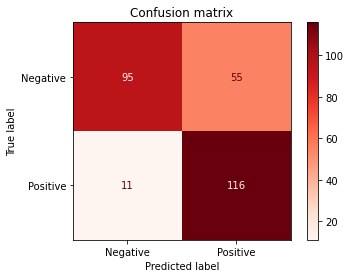

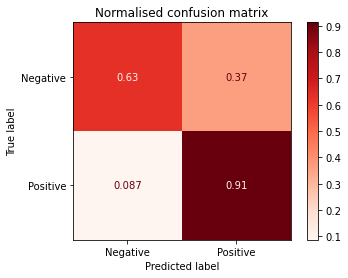

In [29]:
# Plot non-normalized confusion matrix

matrix_visualisation = [("Confusion matrix", None),
                  ("Normalised confusion matrix", 'true')]
for title, normalize in matrix_visualisation:
    disp = plot_confusion_matrix(clf2, x_test, y_test,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# Apply n-gram bag of words